# Notebook de experimentación - Gabriel Tumbaco


In [1]:
%load_ext autoreload
%autoreload 2

In [46]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

from housing_price_prediction.utils.paths import data_raw_dir
from housing_price_prediction.utils.paths import data_interim_dir
from housing_price_prediction.data_cleaning import clean_gabriel_data
from housing_price_prediction.data_cleaning import clean_yadira_data
from housing_price_prediction.data_cleaning import clean_angie_data
from housing_price_prediction.data_cleaning import correct_types

train_path = data_raw_dir() / "train.csv"
df_raw = pd.read_csv(train_path)

## Exploracion y limpieza de las siguientes variables

Variables que describen el terreno, la ubicación y el tipo general de la propiedad.

- MSSubClass
- MSZoning
- LotFrontage
- LotArea
- Street
- Alley
- LotShape
- LandContour
- Utilities
- LotConfig
- LandSlope
- Neighborhood
- Condition1
- Condition2
- BldgType
- HouseStyle

**Experimentacion con el dataset**

In [3]:
vars = [
    'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street', 
    'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig', 
    'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 
    'BldgType', 'HouseStyle', 'SalePrice' 
]

df = df_raw[vars].copy()

In [4]:
print(df.shape)
df.info()

(1460, 17)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 17 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   MSSubClass    1460 non-null   int64  
 1   MSZoning      1460 non-null   object 
 2   LotFrontage   1201 non-null   float64
 3   LotArea       1460 non-null   int64  
 4   Street        1460 non-null   object 
 5   Alley         91 non-null     object 
 6   LotShape      1460 non-null   object 
 7   LandContour   1460 non-null   object 
 8   Utilities     1460 non-null   object 
 9   LotConfig     1460 non-null   object 
 10  LandSlope     1460 non-null   object 
 11  Neighborhood  1460 non-null   object 
 12  Condition1    1460 non-null   object 
 13  Condition2    1460 non-null   object 
 14  BldgType      1460 non-null   object 
 15  HouseStyle    1460 non-null   object 
 16  SalePrice     1460 non-null   int64  
dtypes: float64(1), int64(3), object(13)
memory usage: 194.0+ KB


# Limpieza de las variables

In [5]:
df.isna()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,SalePrice
0,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False
1456,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False
1457,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False
1458,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False


Dato curioso: En Pandas, *isnull* e *isna* son alias para la misma funcion, no hay diferencias 

In [6]:
print("Contador de nulos / na por variables")
df.isnull().sum()

Contador de nulos / na por variables


MSSubClass         0
MSZoning           0
LotFrontage      259
LotArea            0
Street             0
Alley           1369
LotShape           0
LandContour        0
Utilities          0
LotConfig          0
LandSlope          0
Neighborhood       0
Condition1         0
Condition2         0
BldgType           0
HouseStyle         0
SalePrice          0
dtype: int64

## Variables numéricas

#### Inspección Inicial
> Verificar variables numéricas que tienen una desviación estándar cercana a 0, puesto que esto indica que la variable no toma un rango amplio de valores y puede que no aporte significativamente al análisis

In [7]:
df.describe()

,MSSubClass,LotFrontage,LotArea,SalePrice
count,1460.000000,1201.000000,1460.000000,1460.000000
mean,56.897260,70.049958,10516.828082,180921.195890
std,42.300571,24.284752,9981.264932,79442.502883
min,20.000000,21.000000,1300.000000,34900.000000
25%,20.000000,59.000000,7553.500000,129975.000000
50%,50.000000,69.000000,9478.500000,163000.000000
75%,70.000000,80.000000,11601.500000,214000.000000
max,190.000000,313.000000,215245.000000,755000.000000


Las variables numéricas en el dataset presentan una varianza mayor a cero, por lo que se consideran relevantes para la resolución del problema.

### Variable LotFrontage
LotFrontage: Linear feet of street connected to property

In [8]:
print(df['LotFrontage'].isnull().sum())

259


In [9]:
df['LotFrontage'].describe()

count    1201.000000
mean       70.049958
std        24.284752
min        21.000000
25%        59.000000
50%        69.000000
75%        80.000000
max       313.000000
Name: LotFrontage, dtype: float64

Se podria imputar los valores faltantes con la mediana global, pero se investigó que podría ser buena idea agrupar por vecindario y observar como cambia la mediana.
Se elige la mediana porque es una medida de tendencia central que no es sensible a datos atípicos

In [10]:
print(df.groupby('Neighborhood')['LotFrontage'].median())

Neighborhood
Blmngtn    43.0
Blueste    24.0
BrDale     21.0
BrkSide    52.0
ClearCr    80.0
CollgCr    70.0
Crawfor    74.0
Edwards    65.5
Gilbert    65.0
IDOTRR     60.0
MeadowV    21.0
Mitchel    73.0
NAmes      73.0
NPkVill    24.0
NWAmes     80.0
NoRidge    91.0
NridgHt    88.5
OldTown    60.0
SWISU      60.0
Sawyer     71.0
SawyerW    66.5
Somerst    73.5
StoneBr    61.5
Timber     85.0
Veenker    68.0
Name: LotFrontage, dtype: float64


Se observa que la mediana cambia mucho dependiendo del vecindario, por lo tanto no seria una buena idea imputar los valores faltantes de la variables con la mediana global. Una mejor estrategia seria imputar los valores faltantes con los de su correspondiente vecindario.

In [11]:
neighb_median = df.groupby('Neighborhood')['LotFrontage'].transform('median')
print(neighb_median)

0       70.0
1       68.0
2       70.0
3       74.0
4       91.0
        ... 
1455    65.0
1456    80.0
1457    74.0
1458    73.0
1459    65.5
Name: LotFrontage, Length: 1460, dtype: float64


In [12]:
df['LotFrontage'] = df['LotFrontage'].fillna(neighb_median)
print(df['LotFrontage'].isnull().sum())

0


### Variable LotArea
LotArea: Lot size in square feet

In [13]:
df['LotArea'].describe()

count      1460.000000
mean      10516.828082
std        9981.264932
min        1300.000000
25%        7553.500000
50%        9478.500000
75%       11601.500000
max      215245.000000
Name: LotArea, dtype: float64

In [14]:
print(df['LotArea'].isnull().sum())

0


### Variable MSSubClass
MSSubClass: Identifies the type of dwelling involved in the sale.	

        20	1-STORY 1946 & NEWER ALL STYLES
        30	1-STORY 1945 & OLDER
        40	1-STORY W/FINISHED ATTIC ALL AGES
        45	1-1/2 STORY - UNFINISHED ALL AGES
        50	1-1/2 STORY FINISHED ALL AGES
        60	2-STORY 1946 & NEWER
        70	2-STORY 1945 & OLDER
        75	2-1/2 STORY ALL AGES
        80	SPLIT OR MULTI-LEVEL
        85	SPLIT FOYER
        90	DUPLEX - ALL STYLES AND AGES
       120	1-STORY PUD (Planned Unit Development) - 1946 & NEWER
       150	1-1/2 STORY PUD - ALL AGES
       160	2-STORY PUD - 1946 & NEWER
       180	PUD - MULTILEVEL - INCL SPLIT LEV/FOYER
       190	2 FAMILY CONVERSION - ALL STYLES AND AGES

In [15]:
print(df['MSSubClass'].isna().sum())

0


Esta variable es numérica, pero internamente representa una categoría. Por ello, es importante transformar este número a otro tipo de dato, con el objetivo de no confundir luego al modelo.

In [16]:
df['MSSubClass'] = df['MSSubClass'].astype(str)

In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 17 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   MSSubClass    1460 non-null   object 
 1   MSZoning      1460 non-null   object 
 2   LotFrontage   1460 non-null   float64
 3   LotArea       1460 non-null   int64  
 4   Street        1460 non-null   object 
 5   Alley         91 non-null     object 
 6   LotShape      1460 non-null   object 
 7   LandContour   1460 non-null   object 
 8   Utilities     1460 non-null   object 
 9   LotConfig     1460 non-null   object 
 10  LandSlope     1460 non-null   object 
 11  Neighborhood  1460 non-null   object 
 12  Condition1    1460 non-null   object 
 13  Condition2    1460 non-null   object 
 14  BldgType      1460 non-null   object 
 15  HouseStyle    1460 non-null   object 
 16  SalePrice     1460 non-null   int64  
dtypes: float64(1), int64(2), object(14)
memory usage: 194.0+ KB


## Variable SalePrice - Precio de la propiedad en dólares
Es la variable objetivo del proyecto. Vamos a analizarla

In [18]:
#Verificar nulos
print(df['SalePrice'].isnull().sum())

0


In [19]:
df['SalePrice'].describe()

count      1460.000000
mean     180921.195890
std       79442.502883
min       34900.000000
25%      129975.000000
50%      163000.000000
75%      214000.000000
max      755000.000000
Name: SalePrice, dtype: float64

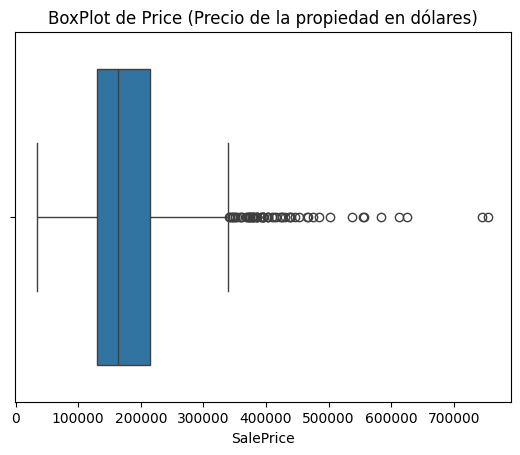

In [20]:
sns.boxplot(x=df['SalePrice'])
plt.title('BoxPlot de Price (Precio de la propiedad en dólares)')
plt.show()

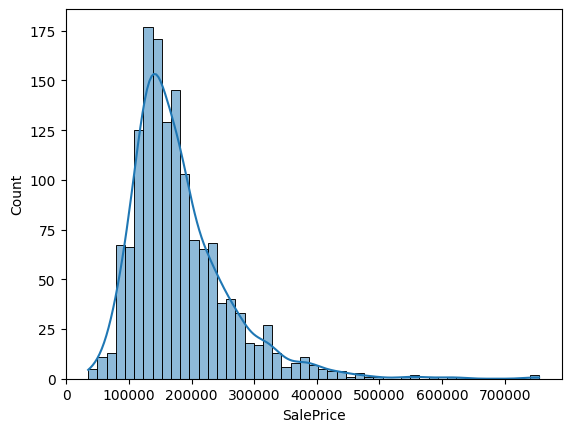

In [21]:
#kde dibuja una curva suave alrededor del histograma
sns.histplot(df['SalePrice'], kde=True)
plt.show()

La distribución de SalePrice está sesgada a la derecha, es decir tiene asimetría positiva. Esto sucede porque la media es superior a la mediana. En definitiva, existen viviendas con un precio de venta muchísimo más altos que el promedio (outliers).

### Outliers en variables numéricas
Luego de la inspección inicial quedaron dos variables numéricas para analizar su distribución mediante diagramas de cajas:

- LotFrontage
- LotArea

#### Boxplot LotFrontage

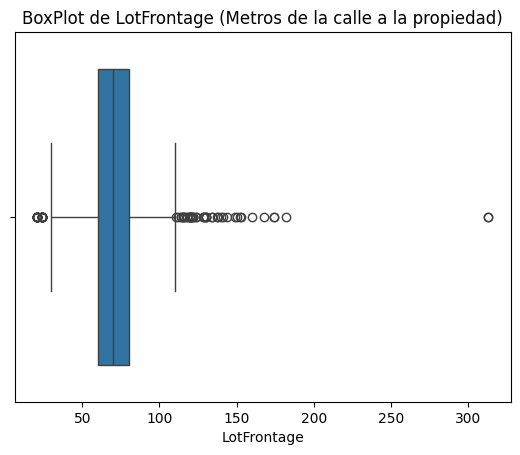

In [22]:
sns.boxplot(x=df['LotFrontage'])
plt.title('BoxPlot de LotFrontage (Metros de la calle a la propiedad)')
plt.show()

#### Boxplot LotArea

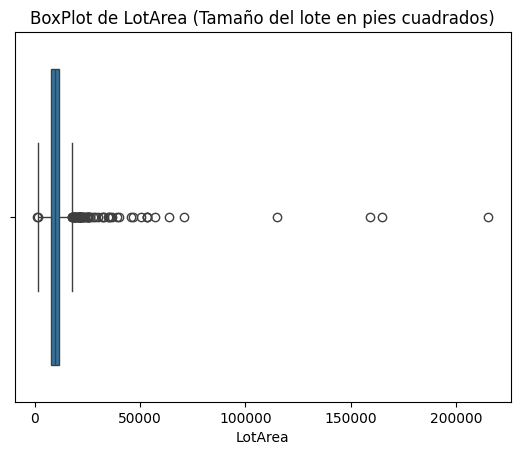

In [23]:
sns.boxplot(x=df['LotArea'])
plt.title('BoxPlot de LotArea (Tamaño del lote en pies cuadrados)')
plt.show()

## Variables categóricas
#### Inspección Inicial
> Verificar variables categóricas que tienen un solo subnivel

In [24]:
cat_vars = ['Alley', 
            'MSZoning', 
            'Street', 
            'LotShape', 
            'LandContour', 
            'Utilities', 
            'LotConfig', 
            'LandSlope', 
            'Neighborhood', 
            'Condition1', 
            'Condition2', 
            'BldgType', 
            'HouseStyle'
        ]

for col in cat_vars:
    print(f"Columna: {col}: {df[col].nunique()} subniveles")

Columna: Alley: 2 subniveles
Columna: MSZoning: 5 subniveles
Columna: Street: 2 subniveles
Columna: LotShape: 4 subniveles
Columna: LandContour: 4 subniveles
Columna: Utilities: 2 subniveles
Columna: LotConfig: 5 subniveles
Columna: LandSlope: 3 subniveles
Columna: Neighborhood: 25 subniveles
Columna: Condition1: 9 subniveles
Columna: Condition2: 8 subniveles
Columna: BldgType: 5 subniveles
Columna: HouseStyle: 8 subniveles


Es posible observar que la variable Street y la variable Utilities tienen pocos subniveles. Hay que tomar en cuenta esto para verificar si en realidad podrian aportar información al análisis o podríamos eliminar por tener una varianza casi nula.

### Variable Alley
Alley: Type of alley access to property

       Grvl	Gravel
       Pave	Paved
       NA 	No alley access

In [25]:
print(df['Alley'].value_counts(dropna=False))

Alley
NaN     1369
Grvl      50
Pave      41
Name: count, dtype: int64


La mayoría de los registros no presentan información de callejón o no tienen callejón. Se eliminará la variable del dataset.

In [26]:
df.drop('Alley', axis=1, inplace=True)

### Variable MSZoning
MSZoning: Identifies the general zoning classification of the sale.
		
       A	Agriculture
       C	Commercial
       FV	Floating Village Residential
       I	Industrial
       RH	Residential High Density
       RL	Residential Low Density
       RP	Residential Low Density Park 
       RM	Residential Medium Density

In [27]:
print(df['MSZoning'].value_counts(dropna=False))

MSZoning
RL         1151
RM          218
FV           65
RH           16
C (all)      10
Name: count, dtype: int64


### Variable Street
Street: Type of road access to property

       Grvl	Gravel	
       Pave	Paved

In [28]:
print(df['Street'].value_counts(dropna=False))

Street
Pave    1454
Grvl       6
Name: count, dtype: int64


El 99% de las observaciones recaen sobre una única categoría en la variable Street. Se procede a eliminar la variable del dataset.

In [29]:
df.drop('Street', axis=1, inplace=True)

### Variable Utilities
Utilities: Type of utilities available
		
       AllPub	All public Utilities (E,G,W,& S)	
       NoSewr	Electricity, Gas, and Water (Septic Tank)
       NoSeWa	Electricity and Gas Only
       ELO	Electricity only	

In [30]:
print(df['Utilities'].value_counts(dropna=False))

Utilities
AllPub    1459
NoSeWa       1
Name: count, dtype: int64


El 99% de las observaciones recaen sobre una única categoría en la variable Street. Se procede a eliminar la variable del dataset.

In [31]:
df.drop('Utilities', axis=1, inplace=True)

## Errores tipográficos
Verificar si existen errores tipográficos y observar los subniveles de cada variable categórica para decidir si eliminar alguna variable que no aporte información para la predicción.

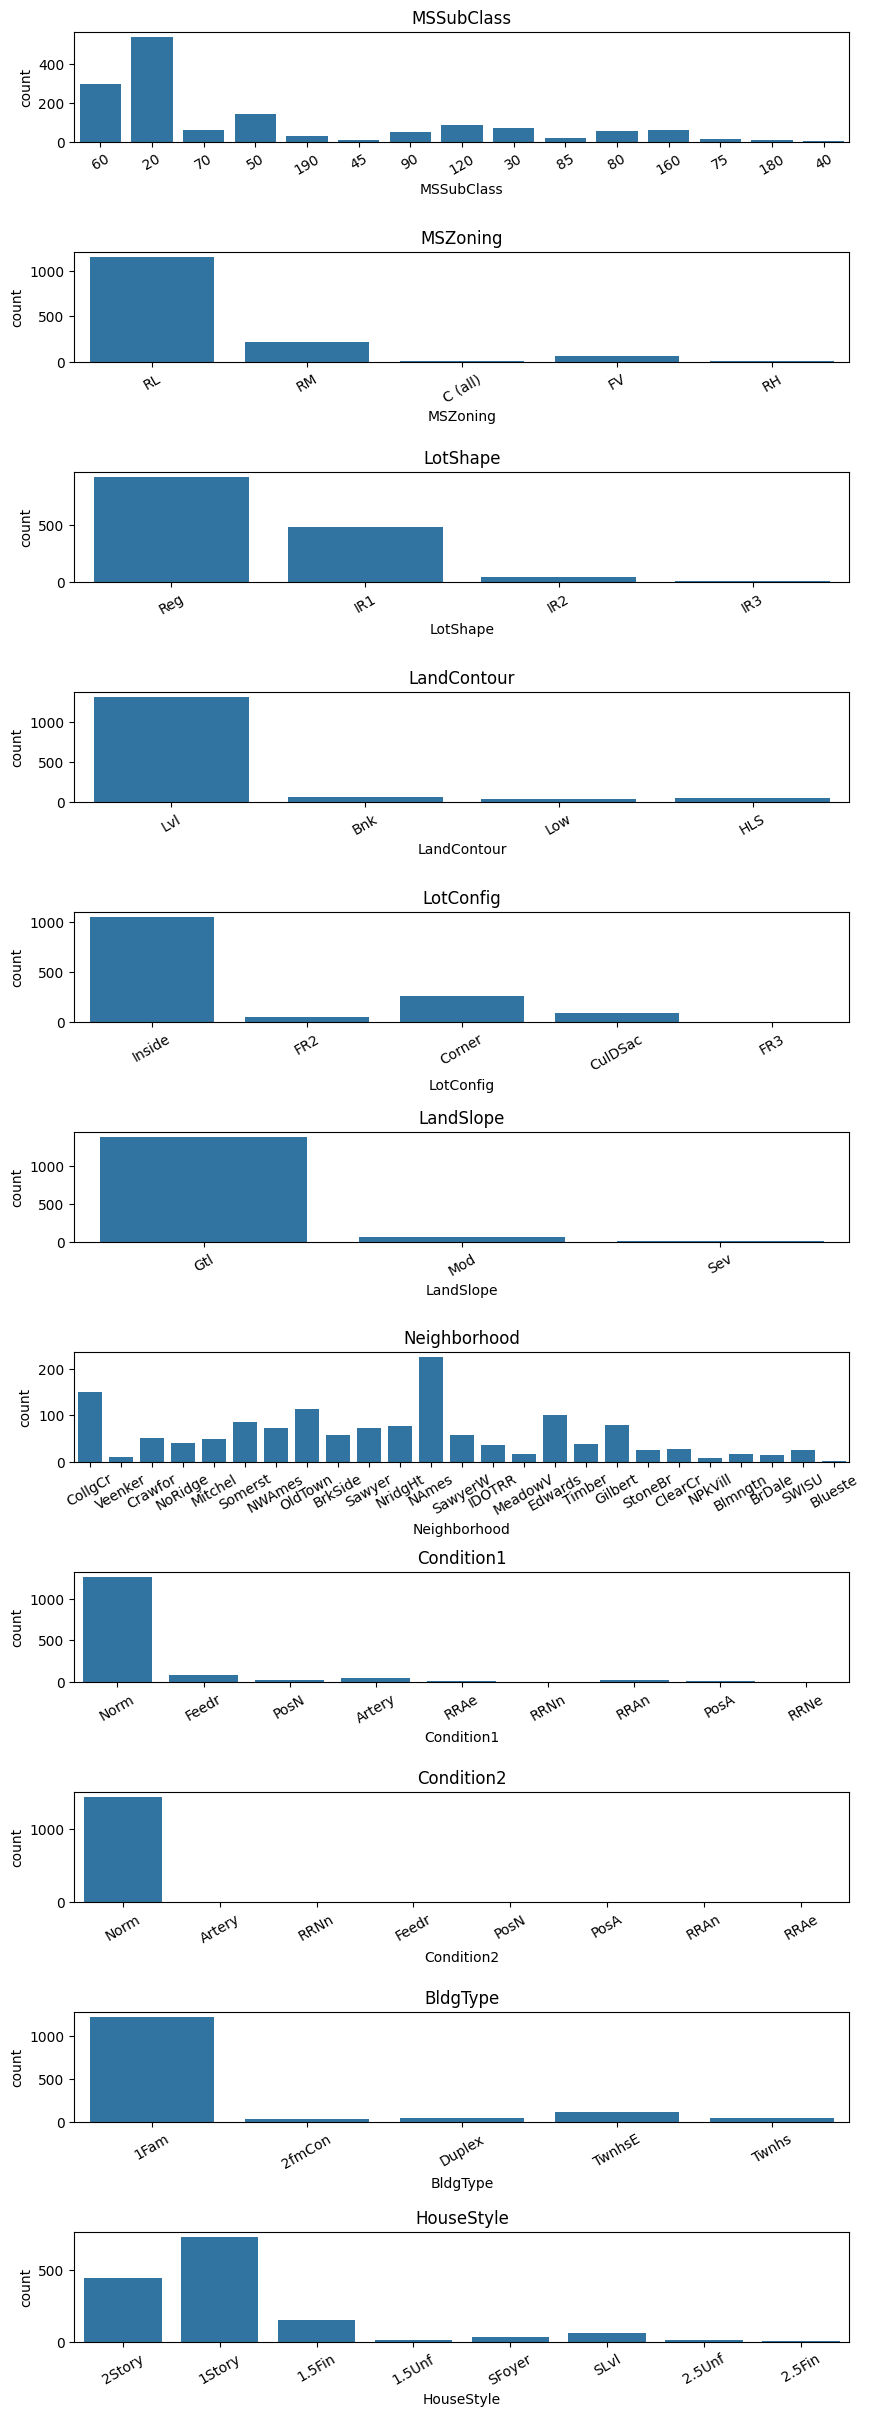

In [32]:
cat_vars = [
            'MSSubClass',
            'MSZoning', 
            'LotShape', 
            'LandContour', 
            'LotConfig', 
            'LandSlope', 
            'Neighborhood', 
            'Condition1', 
            'Condition2', 
            'BldgType', 
            'HouseStyle'
        ]

fig, ax = plt.subplots(nrows=11, ncols=1, figsize=(10,30))
fig.subplots_adjust(hspace=1)

for i, col in enumerate(cat_vars):
    sns.countplot(x=col, data=df, ax=ax[i])
    ax[i].set_title(col)
    plt.setp(ax[i].xaxis.get_majorticklabels(), rotation=30)

### Eliminación de ciertas variables categóricas irrelevantes

In [33]:
print((df['LandContour'].value_counts(dropna=False) / df.shape[0]) * 100)
print((df['LandSlope'].value_counts(dropna=False) / df.shape[0]) * 100)
print((df['Condition1'].value_counts(dropna=False) / df.shape[0]) * 100)
print((df['Condition2'].value_counts(dropna=False) / df.shape[0]) * 100)

LandContour
Lvl    89.794521
Bnk     4.315068
HLS     3.424658
Low     2.465753
Name: count, dtype: float64
LandSlope
Gtl    94.657534
Mod     4.452055
Sev     0.890411
Name: count, dtype: float64
Condition1
Norm      86.301370
Feedr      5.547945
Artery     3.287671
RRAn       1.780822
PosN       1.301370
RRAe       0.753425
PosA       0.547945
RRNn       0.342466
RRNe       0.136986
Name: count, dtype: float64
Condition2
Norm      98.972603
Feedr      0.410959
Artery     0.136986
RRNn       0.136986
PosN       0.136986
PosA       0.068493
RRAn       0.068493
RRAe       0.068493
Name: count, dtype: float64


Se eliminará la variable Condition2 porque +95% de los datos recaen sobre una única categoría y puede que no aporte información relevante al modelo.

In [34]:
df.drop('Condition2', axis=1, inplace=True)

In [35]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   MSSubClass    1460 non-null   object 
 1   MSZoning      1460 non-null   object 
 2   LotFrontage   1460 non-null   float64
 3   LotArea       1460 non-null   int64  
 4   LotShape      1460 non-null   object 
 5   LandContour   1460 non-null   object 
 6   LotConfig     1460 non-null   object 
 7   LandSlope     1460 non-null   object 
 8   Neighborhood  1460 non-null   object 
 9   Condition1    1460 non-null   object 
 10  BldgType      1460 non-null   object 
 11  HouseStyle    1460 non-null   object 
 12  SalePrice     1460 non-null   int64  
dtypes: float64(1), int64(2), object(10)
memory usage: 148.4+ KB


## Filas repetidas

In [36]:
print(f"Tamaño del data set antes de eliminar filas repetidas: {df.shape}")
df.drop_duplicates(inplace=True)
print(f"Tamaño del data set luego de eliminar filas repetidas: {df.shape}")

Tamaño del data set antes de eliminar filas repetidas: (1460, 13)
Tamaño del data set luego de eliminar filas repetidas: (1458, 13)


## Ingeniería de Características

In [37]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1458 entries, 0 to 1459
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   MSSubClass    1458 non-null   object 
 1   MSZoning      1458 non-null   object 
 2   LotFrontage   1458 non-null   float64
 3   LotArea       1458 non-null   int64  
 4   LotShape      1458 non-null   object 
 5   LandContour   1458 non-null   object 
 6   LotConfig     1458 non-null   object 
 7   LandSlope     1458 non-null   object 
 8   Neighborhood  1458 non-null   object 
 9   Condition1    1458 non-null   object 
 10  BldgType      1458 non-null   object 
 11  HouseStyle    1458 non-null   object 
 12  SalePrice     1458 non-null   int64  
dtypes: float64(1), int64(2), object(10)
memory usage: 159.5+ KB


In [38]:
cat_cols = df.select_dtypes(include=['object']).columns.tolist()
target = 'SalePrice'
print(cat_cols)

['MSSubClass', 'MSZoning', 'LotShape', 'LandContour', 'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'BldgType', 'HouseStyle']


### Codificar variables categóricas
Métodos

1. **One-Hot Encoding:** Crea una nueva columna binaria (0 o 1) por cada categoría, siendo mejor para datos nominales (sin orden inherente).
2. **Label Encoding:** Asigna un número entero único a cada categoría, lo cual es ideal para datos ordinales (con un orden natural).

Se aplicará Label Encoding a:
1. LandSlope

Se aplicará One Hot Encoding a:
1. MSSubClass
2. MSZoning
3. LotShape
4. LandContour
5. LotConfig
6. Neighborhood
7. Condition1
8. BldgType
9. HouseStyle

In [39]:
df_features = df.copy()

In [40]:
land_slope_map = {
    'Gtl': 1,
    'Mod': 2,
    'Sev': 3
}

df_features['LandSlope'] = df_features['LandSlope'].map(land_slope_map)

In [41]:
nominal_cols = [
    'MSSubClass', 
    'MSZoning', 
    'LotShape', 
    'LandContour', 
    'LotConfig', 
    'Neighborhood', 
    'Condition1', 
    'BldgType', 
    'HouseStyle'
]

In [ ]:
# con drop first se evita multicolinealidad (redundancia) y el numero de columnas final
df_features = pd.get_dummies(df_features, 
                             columns=nominal_cols, 
                             drop_first=True,
                             dtype=int)
print(f"Forma final (lista para el modelo): {df_features.shape}")

Forma final (lista para el modelo): (1458, 75)


In [43]:
print("Tipos de datos finales")
df_features.info()

Tipos de datos finales
<class 'pandas.core.frame.DataFrame'>
Index: 1458 entries, 0 to 1459
Data columns (total 75 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   LotFrontage           1458 non-null   float64
 1   LotArea               1458 non-null   int64  
 2   LandSlope             1458 non-null   int64  
 3   SalePrice             1458 non-null   int64  
 4   MSSubClass_160        1458 non-null   int64  
 5   MSSubClass_180        1458 non-null   int64  
 6   MSSubClass_190        1458 non-null   int64  
 7   MSSubClass_20         1458 non-null   int64  
 8   MSSubClass_30         1458 non-null   int64  
 9   MSSubClass_40         1458 non-null   int64  
 10  MSSubClass_45         1458 non-null   int64  
 11  MSSubClass_50         1458 non-null   int64  
 12  MSSubClass_60         1458 non-null   int64  
 13  MSSubClass_70         1458 non-null   int64  
 14  MSSubClass_75         1458 non-null   int64  
 15  MSS

In [44]:
print("Vista previa del DataFrame final")
print(df_features.head())

Vista previa del DataFrame final
   LotFrontage  LotArea  LandSlope  SalePrice  MSSubClass_160  MSSubClass_180  \
0         65.0     8450          1     208500               0               0   
1         80.0     9600          1     181500               0               0   
2         68.0    11250          1     223500               0               0   
3         60.0     9550          1     140000               0               0   
4         84.0    14260          1     250000               0               0   

   MSSubClass_190  MSSubClass_20  MSSubClass_30  MSSubClass_40  ...  \
0               0              0              0              0  ...   
1               0              1              0              0  ...   
2               0              0              0              0  ...   
3               0              0              0              0  ...   
4               0              0              0              0  ...   

   BldgType_Duplex  BldgType_Twnhs  BldgType_TwnhsE  

## Correlación de variables

In [47]:
df_features['SalePrice'] = np.log1p(df_features['SalePrice'])

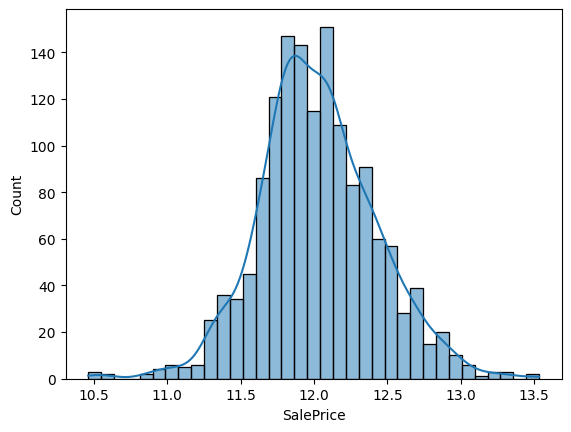

In [49]:
sns.histplot(df_features['SalePrice'], kde=True)
plt.show()

In [50]:
corr_matrix = df_features.corr()
print(corr_matrix)

                   LotFrontage   LotArea  LandSlope  SalePrice  \
LotFrontage           1.000000  0.334697   0.086481   0.352339   
LotArea               0.334697  1.000000   0.436836   0.256678   
LandSlope             0.086481  0.436836   1.000000   0.038312   
SalePrice             0.352339  0.256678   0.038312   1.000000   
MSSubClass_160       -0.355759 -0.163517  -0.047200  -0.112285   
...                        ...       ...        ...        ...   
HouseStyle_2.5Fin     0.028174  0.014437   0.050426   0.031612   
HouseStyle_2.5Unf    -0.036466 -0.012014  -0.019694  -0.025257   
HouseStyle_2Story     0.013871 -0.010994  -0.030491   0.265106   
HouseStyle_SFoyer    -0.074534 -0.046171  -0.036448  -0.096139   
HouseStyle_SLvl       0.045426  0.000203   0.011342  -0.012063   

                   MSSubClass_160  MSSubClass_180  MSSubClass_190  \
LotFrontage             -0.355759       -0.167415       -0.019428   
LotArea                 -0.163517       -0.068956        0.081083   


In [58]:
sale_corr = corr_matrix['SalePrice'].sort_values(ascending=False)
N_FEATURES = 5
top_features = sale_corr.head(N_FEATURES).index
print(f"Top {N_FEATURES} variables más correlacionadas con SalePrice:")
print(sale_corr.head(N_FEATURES))

Top 5 variables más correlacionadas con SalePrice:
SalePrice               1.000000
MSSubClass_60           0.401210
LotFrontage             0.352339
Neighborhood_NridgHt    0.351712
MSZoning_RL             0.297769
Name: SalePrice, dtype: float64


In [52]:
top_corr_matrix = df_features[top_features].corr()

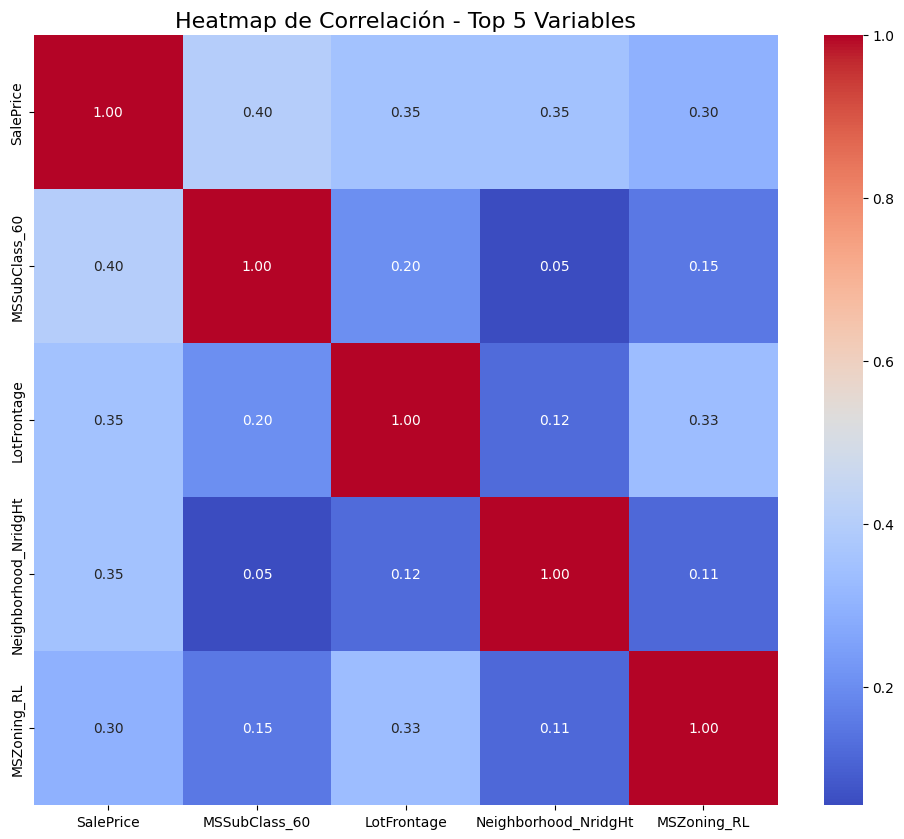

In [57]:
plt.figure(figsize=(12, 10))  
sns.heatmap(
    top_corr_matrix, 
    annot=True,      
    cmap='coolwarm', 
    fmt='.2f'      
)
plt.title(f'Heatmap de Correlación - Top {N_FEATURES} Variables', fontsize=16)
plt.show()